# Notebook 02 — Exploratory Data Analysis (EDA) & Key Insights
Goal:
Understand who churns and why, using visual evidence that we can later connect to features and business actions.

## 02.1 Imports + load cleaned data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_STATE = 42
pd.set_option("display.max_columns", 100)

DATA_PATH = r"C:\Users\farbo\OneDrive\Desktop\churn-analysis\data\telco_churn_clean.csv"
df = pd.read_csv(DATA_PATH)

df.head()


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## 02.2 Target distribution (class imbalance)

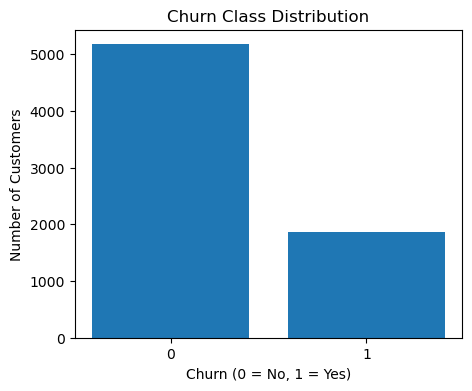

churn
0    5174
1    1869
Name: count, dtype: int64
Churn rate: 0.2653698707936959


In [2]:
churn_counts = df["churn"].value_counts()

plt.figure(figsize=(5,4))
plt.bar(churn_counts.index.astype(str), churn_counts.values)
plt.title("Churn Class Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

print(churn_counts)
print("Churn rate:", df["churn"].mean())


## 02.3 Churn vs Tenure

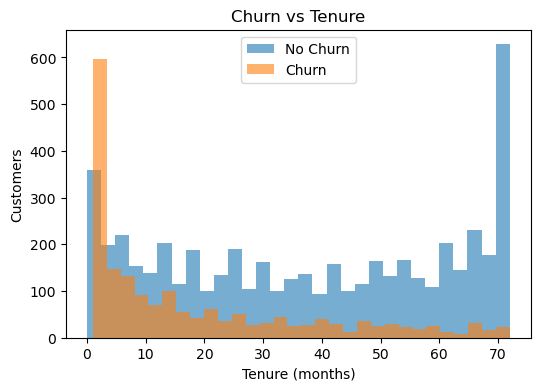

In [3]:
plt.figure(figsize=(6,4))
plt.hist(df[df["churn"] == 0]["tenure"], bins=30, alpha=0.6, label="No Churn")
plt.hist(df[df["churn"] == 1]["tenure"], bins=30, alpha=0.6, label="Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Customers")
plt.title("Churn vs Tenure")
plt.legend()
plt.show()


## 02.4 Churn vs Contract Type

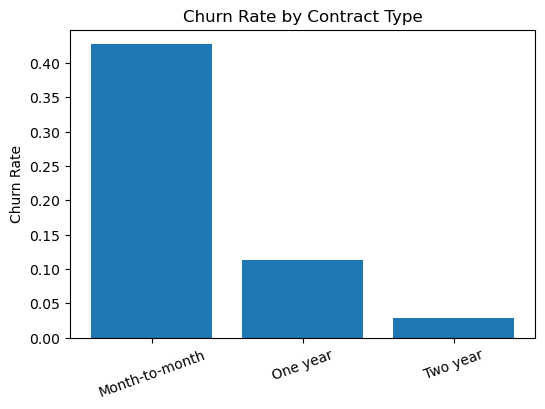

contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: churn, dtype: float64

In [4]:
contract_churn = (
    df.groupby("contract")["churn"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
plt.bar(contract_churn.index, contract_churn.values)
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Contract Type")
plt.xticks(rotation=20)
plt.show()

contract_churn


## 02.5 Churn vs Payment Method

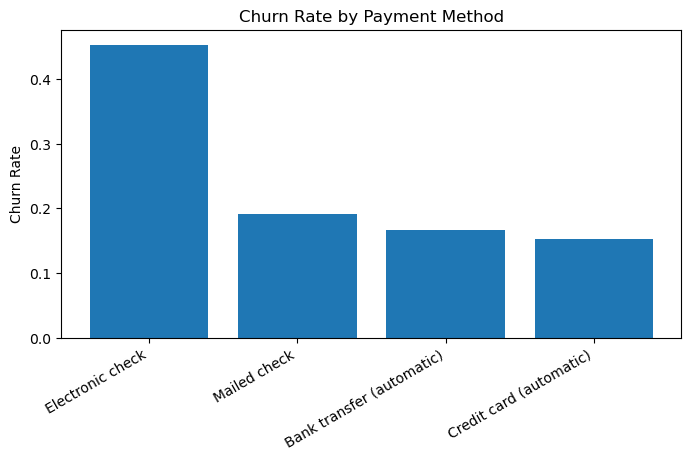

paymentmethod
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: churn, dtype: float64

In [5]:
payment_churn = (
    df.groupby("paymentmethod")["churn"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(8,4))
plt.bar(payment_churn.index, payment_churn.values)
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=30, ha="right")
plt.show()

payment_churn


## 02.6 Churn vs Monthly Charges

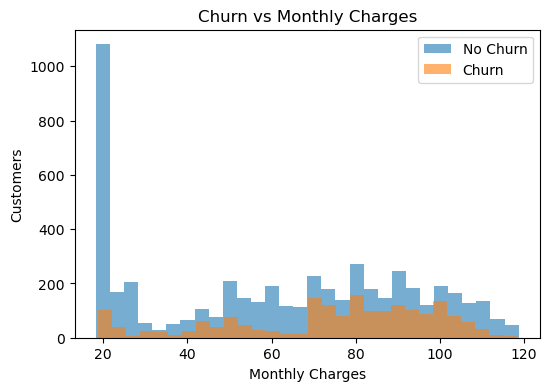

In [6]:
plt.figure(figsize=(6,4))
plt.hist(df[df["churn"] == 0]["monthlycharges"], bins=30, alpha=0.6, label="No Churn")
plt.hist(df[df["churn"] == 1]["monthlycharges"], bins=30, alpha=0.6, label="Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Customers")
plt.title("Churn vs Monthly Charges")
plt.legend()
plt.show()


## 02.7 Churn vs Total Charges

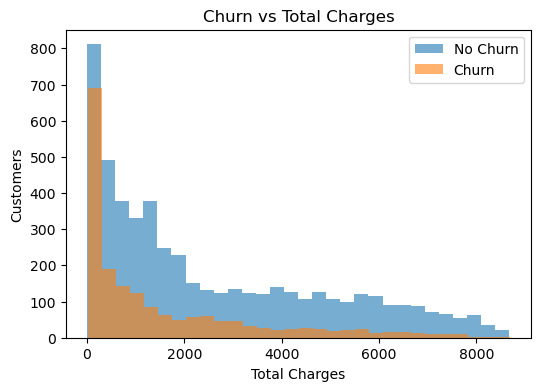

In [7]:
plt.figure(figsize=(6,4))
plt.hist(df[df["churn"] == 0]["totalcharges"], bins=30, alpha=0.6, label="No Churn")
plt.hist(df[df["churn"] == 1]["totalcharges"], bins=30, alpha=0.6, label="Churn")
plt.xlabel("Total Charges")
plt.ylabel("Customers")
plt.title("Churn vs Total Charges")
plt.legend()
plt.show()


## 02.8 Churn vs Key Services (Tech Support example)

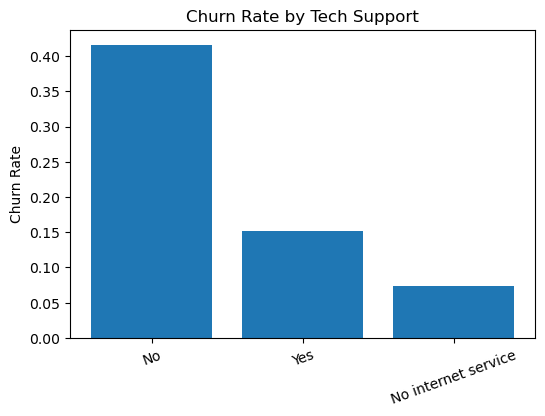

techsupport
No                     0.416355
Yes                    0.151663
No internet service    0.074050
Name: churn, dtype: float64

In [8]:
tech_churn = (
    df.groupby("techsupport")["churn"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
plt.bar(tech_churn.index.astype(str), tech_churn.values)
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Tech Support")
plt.xticks(rotation=20)
plt.show()

tech_churn


## 02.9 EDA Summary — Key Insights (write this in Markdown)

### Key EDA Insights

1. Churn rate is ~26.5%, indicating moderate class imbalance.
2. Customers with short tenure are significantly more likely to churn.
3. Month-to-month contracts have the highest churn; long-term contracts are protective.
4. Electronic check payment method is associated with higher churn.
5. Higher monthly charges increase churn risk, while total charges are lower for churners due to short tenure.
6. Customers without value-added services (e.g., Tech Support) churn more frequently.
